# Lab 4 : Regularization

---



## 1. Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

## 2. Importing the dataset

In [2]:
dataset = pd.read_csv("auto-mpg.csv")

## 3. Data preprocessing

### Data shape and column data types

In [3]:
print("Dataset Shape:", dataset.shape)

Dataset Shape: (398, 9)


In [4]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Handling missing values

In [5]:
print("Missing Values: ")
dataset.isnull().sum()

Missing Values: 


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
dataset['horsepower'] = dataset['horsepower'].replace('?', np.nan)

In [7]:
print("Missing Values: ")
dataset.isnull().sum()

Missing Values: 


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
imputer = SimpleImputer(strategy='mean')
dataset['horsepower'] = imputer.fit_transform(dataset[['horsepower']])

In [9]:
print("Missing Values: ")
dataset.isnull().sum()

Missing Values: 


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Removing unnecessary column(s)

In [10]:
dataset = dataset.drop("car name", axis=1)
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

### Handling duplicate values

In [11]:
dataset.drop_duplicates(inplace=True)

In [12]:
dataset.shape

(398, 8)

### Plotting histograms

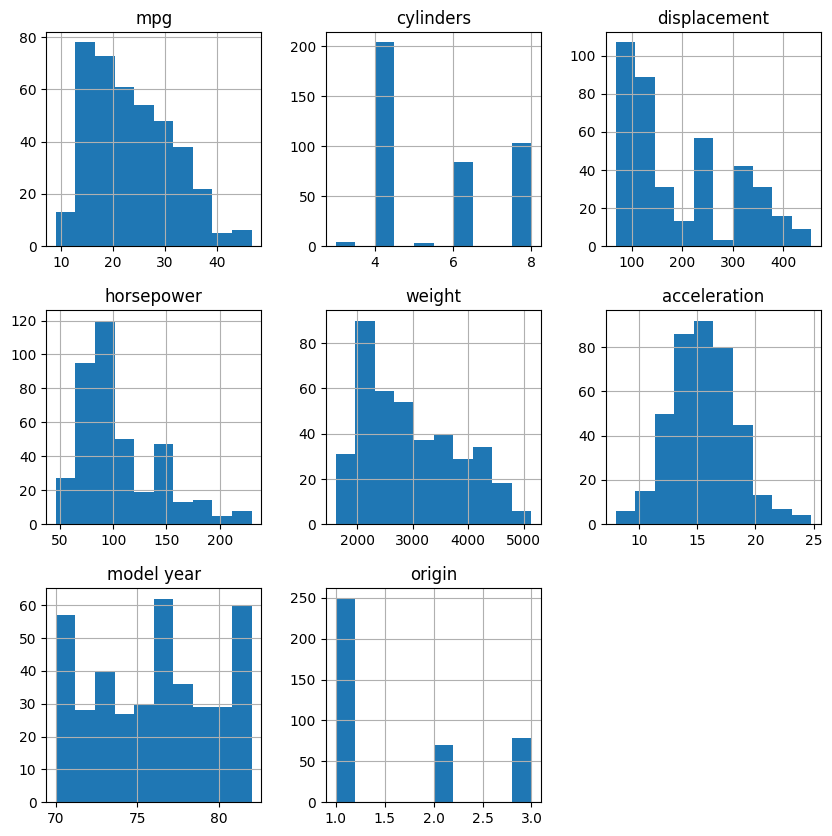

In [13]:
dataset.hist(figsize=(10, 10))
plt.show()

### Correlation matrix

In [14]:
corr_matrix = dataset.corr()
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


### Displaying first and last 5 entries of the dataset

In [15]:
# first 5 entries
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [16]:
# last 5 entries
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


## 3. Splitting the dataset into training and test set

In [ ]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [17]:
X = dataset.drop("mpg", axis=1)
y = dataset["mpg"]

In [ ]:
print(X)

In [ ]:
print(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train.shape

(278, 7)

In [20]:
X_test.shape

(120, 7)

In [21]:
y_train.shape

(278,)

In [22]:
y_test.shape

(120,)

## 4. Linear regression

### Training the model

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Evaluating the model

In [24]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE : {:.4}\nR^2 : {:.4}".format(mse, r2))

MSE : 9.279
R^2 : 0.8383


### Visualizing predicted vs actual values


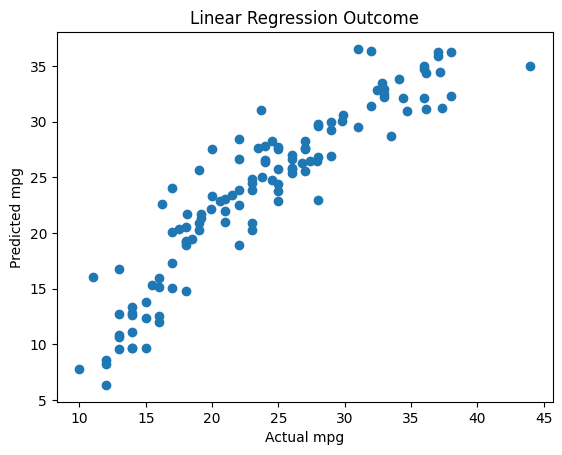

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")
plt.title("Linear Regression Outcome")
plt.show()

### Analyzing the coefficients

In [30]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": regressor.coef_})
print("\nLinear Regression Coefficients:")
coefficients


Linear Regression Coefficients:


,Feature,Coefficient
0,cylinders,0.026826
1,displacement,0.007092
2,horsepower,-0.003745
3,weight,-0.006521
4,acceleration,0.132499
5,model year,0.788528
6,origin,1.487864


Interpretation on the basis of Coefficients:

*   The strongest positive impact on MPG comes from the 'model year' and 'origin' features.
*   The strongest negative impact on MPG comes from 'weight' and 'horsepower'.

## L1 Norm (Lasso) and L2 Norm (Ridge)

#### Applying feature scaling

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Lasso regression

In [32]:
lasso_model = Lasso()
lasso_params = {'alpha': np.logspace(-4, 4, 9)}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])})

#### Ridge regression

In [33]:
ridge_model = Ridge()
ridge_params = {'alpha': np.logspace(-4, 4, 9)}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])})

#### Evaluating both regression models

In [34]:
lasso_pred = lasso_grid.predict(X_test_scaled)
ridge_pred = ridge_grid.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

In [35]:
# Compare coefficients
lasso_coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso_grid.best_estimator_.coef_})
ridge_coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": ridge_grid.best_estimator_.coef_})

print("\nLasso Regression Coefficients:")
print(lasso_coefficients)

print("\nRidge Regression Coefficients:")
print(ridge_coefficients)


Lasso Regression Coefficients:
        Feature  Coefficient
0     cylinders    -0.000000
1  displacement    -0.000000
2    horsepower    -0.087280
3        weight    -4.831270
4  acceleration     0.180605
5    model year     2.696386
6        origin     1.032682

Ridge Regression Coefficients:
        Feature  Coefficient
0     cylinders     0.042791
1  displacement     0.557975
2    horsepower    -0.200714
3        weight    -5.212773
4  acceleration     0.317570
5    model year     2.773397
6        origin     1.185270


#### Conclusion and Interpretations

Lasso Regression:

* Feature Selection: Lasso regression performs automatic feature selection by driving some coefficients to exactly zero. In this case, the coefficients for 'cylinders' and 'displacement' are zero, indicating that these features have been effectively excluded from the model.

* Significant Impact: The most influential features with non-zero coefficients are 'weight' (-4.831270), 'model year' (2.696386), 'origin' (1.032682), and 'acceleration' (0.180605).

* Sparse Model: Lasso tends to create sparse models, which means it prefers a model with fewer features. It's useful when there are many features, and some are irrelevant or redundant.

Ridge Regression:

* Shrinkage Effect: Ridge regression penalizes large coefficients without driving them all the way to zero. As a result, all features have non-zero coefficients in this case.

* Balanced Impact: The impact of 'cylinders', 'displacement', 'acceleration', 'model year', and 'origin' is balanced, indicating that Ridge regression doesn't strongly favor excluding any particular feature.

* Continuous Impact: Unlike Lasso, Ridge tends to keep all features in the model but with reduced impact. The coefficients are shrunken towards zero but not set to zero.

Summary:
* In summary, Lasso and Ridge regression offer different approaches to handling the complexity of the model and feature selection, and the choice between them depends on the specific characteristics of the dataset and modeling goals.



---



---

